In [1]:
from qudi.hardware.picoquant.ppg512 import *
wg = waveform_generation()

In [2]:
pulses = wg.create_pulses(2, 10, 300, pulse_shape='gauss')
wg.create_a_waveform_file(pulses)

Stored waveform in C:\Users\yy3\bwSyncShare\01_Uni Stuttgart\PhD\11_Git\squdi\src\qudi\hardware\picoquant\waveform.txt


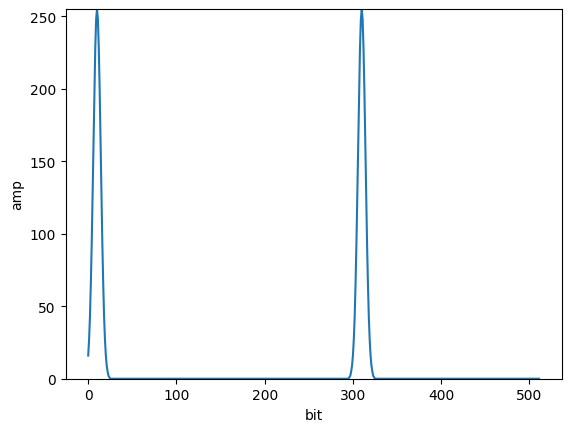

In [3]:
wg.plot_waveform_from_file()

In [71]:
def create_pulses(num_pulses, width, spacing, amp=255, pulse_shape='square', initial_delay=0):
    
    voltages = np.zeros((512,))
    if amp > 255: raise Exception('amp needs to be 255 or less.')
    if num_pulses*(width+spacing) - spacing > 512: raise Exception('length of pulsetrain needs to be 512 bits or less.')
        
    if pulse_shape == 'square':    
       pos = initial_delay 
       for i in range(num_pulses):
           voltages[pos:pos+width]=np.ones(width)*amp
           pos+=width+spacing
           
    elif pulse_shape == 'gauss': 
        sigma = pulse_width / (2 * np.sqrt(2 * np.log(2)))
        if initial_delay == 0:
            initial_delay = pulse_width
            
        # Generate pulses
        for i in range(num_pulses):
            # Calculate the center of each pulse
            center = i * spacing + initial_delay
    
            # Generate the Gaussian pulse
            x = np.arange(512)
            pulse = amp*np.exp(-(x - center)**2 / (2 * sigma**2))
    
            # Add the pulse to the output array
            voltages += pulse

        
        

    
    else:
        raise Exception('Typo or pulse shape not (yet) availible.')

    return voltages
        

In [48]:

gauss = lambda i, pos : amp*np.exp(-(i-pos)**2.0 / width**2.0)

In [51]:
import numpy as np

def generate_gaussian_pulses(num_pulses, pulse_spacing, pulse_width):
    # Initialize the output array
    output = np.zeros(512)

    # Calculate standard deviation from the pulse width
    # Assuming pulse_width refers to full width at half maximum (FWHM)
    sigma = pulse_width / (2 * np.sqrt(2 * np.log(2)))

    # Generate pulses
    for i in range(num_pulses):
        # Calculate the center of each pulse
        center = i * pulse_spacing

        # Generate the Gaussian pulse
        x = np.arange(512)
        pulse = np.exp(-(x - center)**2 / (2 * sigma**2))

        # Add the pulse to the output array
        output += pulse

    # Scale to max amplitude 255 and convert to integers
    output = np.clip(output, 0, 1)  # Normalize between 0 and 1
    output = (output * 255).astype(int)

    return output

# Example usage
num_pulses = 5
pulse_spacing = 100
pulse_width = 20
output = generate_gaussian_pulses(num_pulses, pulse_spacing, pulse_width)
